In [1]:
import pandas as pd           # For data manipulation
import numpy as np            # For numerical operations
from sklearn.model_selection import train_test_split   # For splitting data into train/test sets
from sklearn.linear_model import LogisticRegression     # For the logistic regression model
from sklearn.metrics import accuracy_score              # To evaluate model performance

# Load the data
path = 'D:\BIM\Summer Project\datasets\cleaned_ibm_dataset.pkl'
data = pd.read_pickle(path)

<>:8: SyntaxWarning: invalid escape sequence '\B'
<>:8: SyntaxWarning: invalid escape sequence '\B'
C:\Users\sworn\AppData\Local\Temp\ipykernel_18624\460323295.py:8: SyntaxWarning: invalid escape sequence '\B'
  path = 'D:\BIM\Summer Project\datasets\cleaned_ibm_dataset.pkl'


In [14]:
# Split the data into features and target
X = data.drop('Attrition', axis=1) # Input variables
y = data['Attrition'] # Variable to predict

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=41)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
# print(X_test[:1])

# Standardize the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# print(X_test[:1])

(1102, 53) (368, 53) (1102,) (368,)


In [8]:
# Create and train the logistic regression model
model = LogisticRegression(class_weight='balanced', max_iter=2000, random_state=42) # Instance of the model
model.fit(X_train, y_train) # Train the model

# Make predictions on the test set
predictions = model.predict(X_test)
print(predictions[:])

# Evaluate the model's performance
accuracy = accuracy_score(y_test, predictions)
print(f'\nModel accuracy: {accuracy:.2f}\n')

from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

[0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 1 1 0 0 0 0 0 1 1
 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 1
 0 0 0 0 1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 1 0 1 0 1 0 0 0 0 1 0
 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0
 1 0 0 0 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 1 0 1 0 1 0
 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 1 1 0 1 1 0 1 1 0 1 0 0 0 0 0
 0 0 0 1 0 0 1 1 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0
 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0]

Model accuracy: 0.76

              precision    recall  f1-score   support

           0       0.95      0.76      0.84       318
           1       0.32      0.72      0.44        50

    accuracy                           0.76       368
   macro avg

[[242  76]
 [ 14  36]]


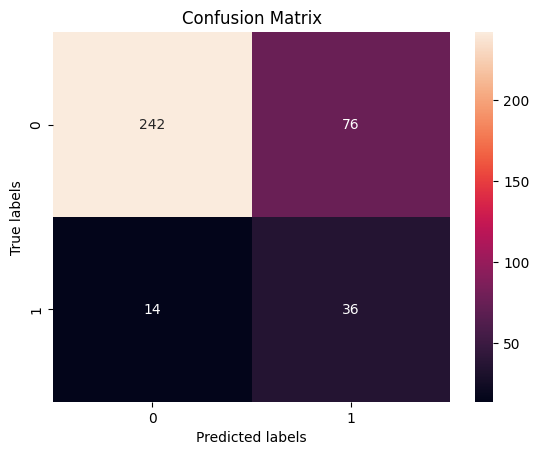

In [9]:
from sklearn.metrics import confusion_matrix

# Create a confusion matrix

cm = confusion_matrix(y_test, predictions)
print(cm)

# Plot the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

plt.title('Confusion Matrix')
plt.show()